# Transformers Library (Hugging Face) - Testing Googles BERT & T5

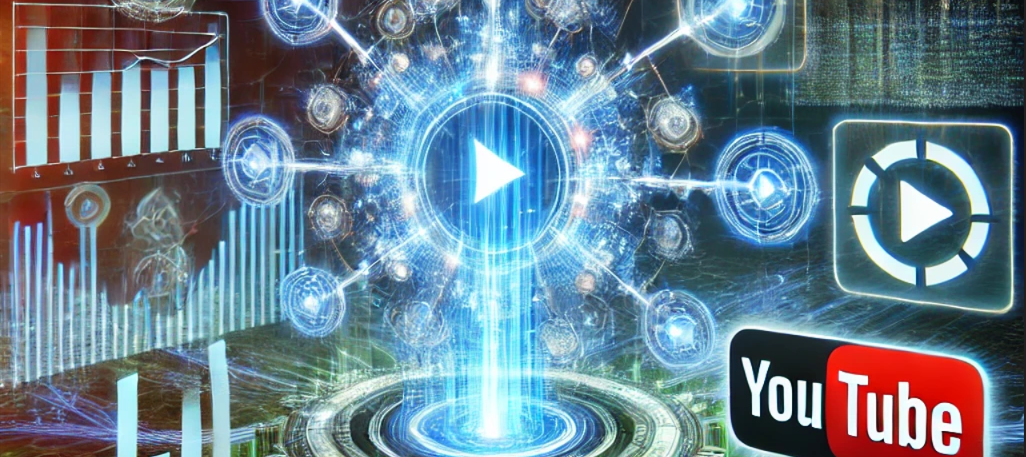

In [42]:
import os
from IPython.display import Image
PATH = "C:\\Users\\pitsi\\Desktop\\2024 Youtube\\1.OpenAI_Chatbot\\"
Image("AI Pic 4.png",width=900, height=700)

## Agenda

1. Why choose Transformers
2. Libraries to install
3. How to etract the text from PDF
4. How to summarize the text
5. How to question the text
6. How to deploy - Streamlit App
7. Compare with the API LLMs

#### Transformers Library (Hugging Face Transformers): 
The Transformers library allows you to download, fine-tune, and use models locally on your own machine or infrastructure. It gives you full control over how you work with the models.

When using LLM models, you generally have two main options: using the Transformers library (e.g., Hugging Face's transformers) or calling models via APIs (such as OpenAI, Google, or Hugging Face APIs). Both approaches have their pros and cons depending on your project

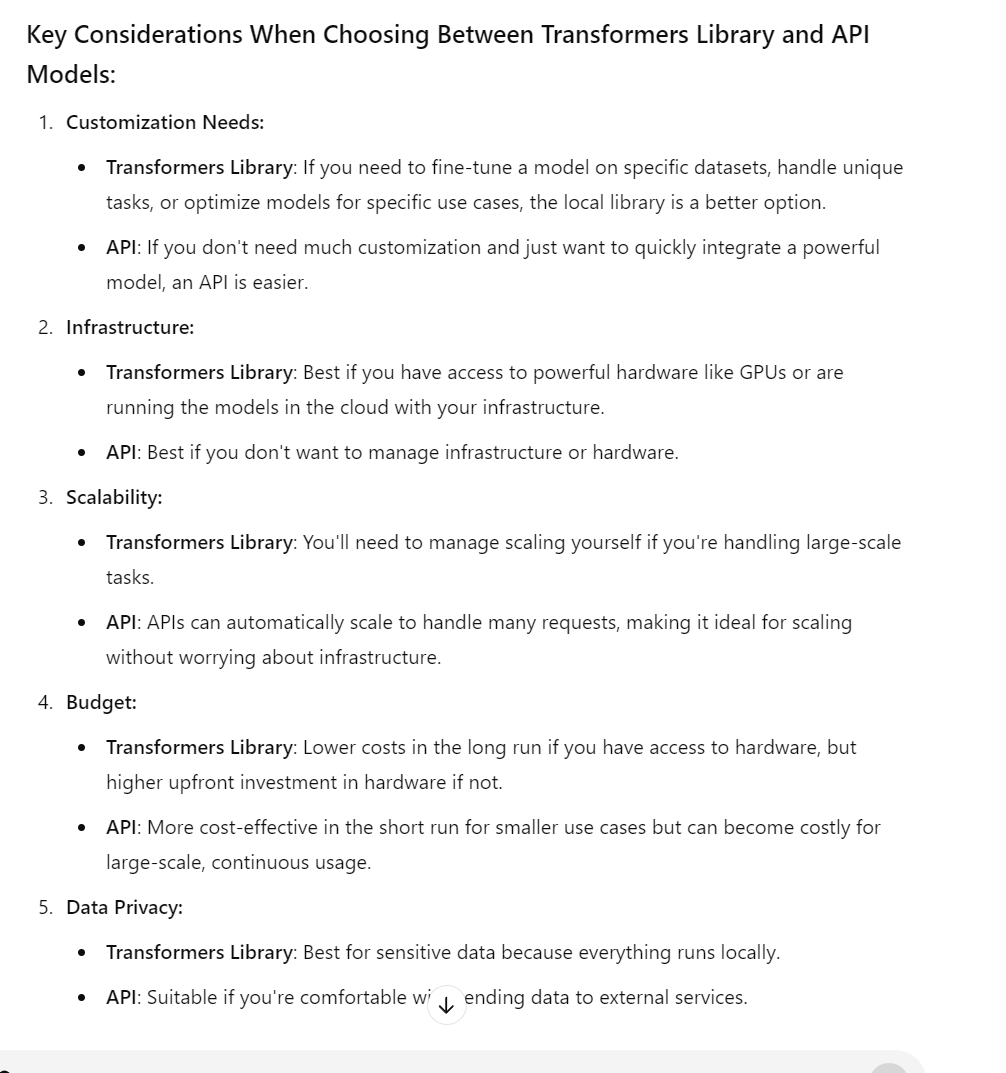

In [52]:
Image("transf Vs API 1.png",width=900, height=700)

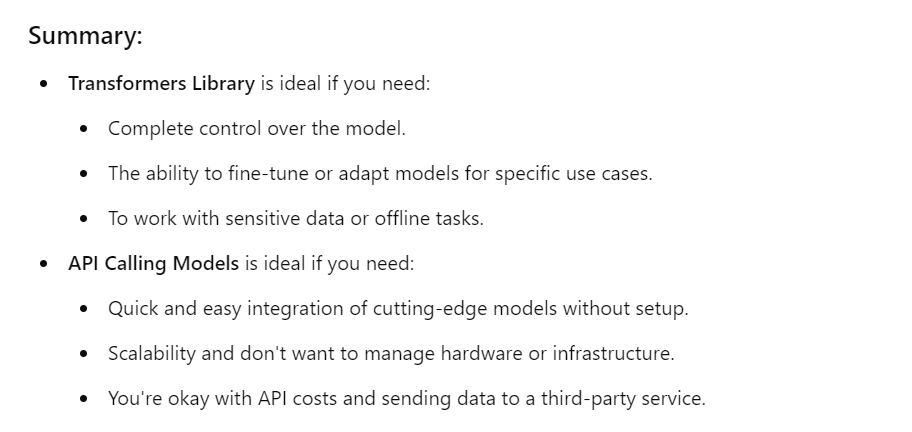

In [50]:
Image("transf Vs API 2.png",width=900, height=700)

## 1. Libraries to install

In [ ]:
# pip install openai PyPDF2 pdfplumber

In [ ]:
# pip install streamlit

In [ ]:
# pip install --upgrade plotly

In [5]:
# pip install pymupdf

In [5]:
# pip install transformers

In [15]:
# pip install torch

In [13]:
# pip install tensorflow

In [1]:
# pip install sentencepiece

In [3]:
# pip install tf-keras

In [5]:
# Importing our libraries

# import openai
import pdfplumber
import os

import fitz  # PyMuPDF for PDF extraction
from transformers import T5Tokenizer, T5ForConditionalGeneration, BertTokenizer, BertForQuestionAnswering, pipeline


## 2. Extracting Text from PDF

In [24]:
def extract_text_from_pdf(pdf_path):
    """Extract text from a PDF file."""
    doc = fitz.open(pdf_path)
    text = ''
    for page_num in range(len(doc)):
        page = doc.load_page(page_num)
        text += page.get_text()
    return text

In [26]:
text = extract_text_from_pdf('Bitwise-The-Year-Ahead-10-Crypto-Predictions-for-2024.pdf')
text

'The Year Ahead:\n10 Crypto Predictions for 2024\nbitwiseinvestments.com\n12-2023\n1   |   The Year Ahead: 10 Crypto Predictions for 2024   |   Table of Contents\nIntro:\nEntering the Mainstream Era of Crypto\n03\nPrediction 1:\nBitcoin will trade above $80,000, setting a new all-time high.\n04\nPrediction 2:\nSpot bitcoin ETFs will be approved, and collectively they will be the most successful\nETF launch of all time.\n05\nPrediction 3:\nCoinbase’s revenue will double, beating Wall Street expectations by at least 10x.\n06\nPrediction 4:\nMore money will settle using stablecoins than using Visa.\n07\nPrediction 5:\nJ.P. Morgan will tokenize a fund and launch it on-chain as Wall Street gears up to\ntokenize real-world assets.\n08\nPrediction 6:\nEthereum revenue will more than double to $5 billion as users flock to crypto applications.\n09\nTable of Contents\n2   |   The Year Ahead: 10 Crypto Predictions for 2024   |   Table of Contents\nPrediction 7:\nTaylor Swift will launch NFTs to c

## 3. Summarizes the text using Google's T5

In [28]:
# Initialize T5 model and tokenizer for summarization
t5_tokenizer = T5Tokenizer.from_pretrained('t5-small')
t5_model = T5ForConditionalGeneration.from_pretrained('t5-small')

def summarize_text(text):
    """Summarize the given text using T5."""
    inputs = t5_tokenizer.encode("summarize: " + text, return_tensors="pt", max_length=1024, truncation=True)
    outputs = t5_model.generate(inputs, max_length=150, min_length=30, length_penalty=2.0, num_beams=4, early_stopping=True)
    summary = t5_tokenizer.decode(outputs[0], skip_special_tokens=True)
    return summary

# doc: https://huggingface.co/docs/transformers/en/model_doc/t5

In [30]:
summarize_text(text)

'the year Ahead: 10 Crypto Predictions for 2024 | The Year Ahead: 10 Crypto Predictions for 2024 | Table of Contents Intro: Entering the Mainstream Era of Crypto 03 Prediction 1: Bitcoin will trade above $80,000, setting a new all-time high. 05 Prediction 2: Coinbase’s revenue will double, beating Wall Street expectations by at least 10x.'

## 4. Asks a question about the text using Google's Bert

In [32]:
# Initialize BERT model and tokenizer for question answering
qa_pipeline = pipeline('question-answering', model='bert-large-uncased', tokenizer='bert-large-uncased')


def answer_question(question, context):
    """Answer a question based on the context using BERT."""
    result = qa_pipeline(question=question, context=context)
    return result['answer']

## doc: https://cloud.google.com/ai-platform/training/docs/algorithms/reference/bert

Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at bert-large-uncased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [34]:
# Example questions
questions = [
    "What is the main topic of the document?",
    "Who are the key people mentioned?",
]

for question in questions:
    answer = answer_question(question, text)
    print(f"Question: {question}")
    print(f"Answer: {answer}")

Question: What is the main topic of the document?
Answer: by the 
reader as research or
Question: Who are the key people mentioned?
Answer: : 2023 revenue is annualized


## Creating the main() function and putting it all together

In [36]:
import PyPDF2
from transformers import T5Tokenizer, T5ForConditionalGeneration, pipeline

# Initialize T5 model and tokenizer for summarization
t5_tokenizer = T5Tokenizer.from_pretrained('t5-small')
t5_model = T5ForConditionalGeneration.from_pretrained('t5-small')

# Initialize BERT model and tokenizer for question answering
qa_pipeline = pipeline('question-answering', model='bert-large-uncased', tokenizer='bert-large-uncased')

def extract_text_from_pdf(pdf_path):
    """Extract text from a PDF file."""
    text = ""
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        for page in reader.pages:
            text += page.extract_text()
    return text

def summarize_text(text):
    """Summarize the given text using T5."""
    inputs = t5_tokenizer.encode("summarize: " + text, return_tensors="pt", max_length=1024, truncation=True)
    outputs = t5_model.generate(inputs, max_length=150, min_length=30, length_penalty=2.0, num_beams=4, early_stopping=True)
    summary = t5_tokenizer.decode(outputs[0], skip_special_tokens=True)
    return summary

def answer_question(question, context):
    """Answer a question based on the context using BERT."""
    result = qa_pipeline(question=question, context=context)
    return result['answer']

# Example usage
pdf_path = 'Bitwise-The-Year-Ahead-10-Crypto-Predictions-for-2024.pdf'
text = extract_text_from_pdf(pdf_path)
summary = summarize_text(text)

print("Summary:")
print(summary)

# Example questions
questions = [
    "What is the main topic of the document?",
    "Who are the key people mentioned?",
]

for question in questions:
    answer = answer_question(question, text)
    print(f"Question: {question}")
    print(f"Answer: {answer}")

Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at bert-large-uncased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Summary:
Bitcoin will trade above $80,000, setting a new all-time high. a spot bitcoin ETF is expected to usher in a wave of new capital from retail and institutional investors, causing demand for bitcoin to rise.
Question: What is the main topic of the document?
Answer: prices of NFT items could be negatively affected. The market for
Question: Who are the key people mentioned?
Answer: available only to institutional and individual accredited 
investors


## Deploying this in a Streamlit app

In [38]:
import streamlit as st
import PyPDF2
from transformers import T5Tokenizer, T5ForConditionalGeneration, pipeline

# Initialize models and tokenizers
t5_tokenizer = T5Tokenizer.from_pretrained('t5-small')
t5_model = T5ForConditionalGeneration.from_pretrained('t5-small')
qa_pipeline = pipeline('question-answering', model='bert-large-uncased', tokenizer='bert-large-uncased')

def extract_text_from_pdf(pdf_file):
    """Extract text from the uploaded PDF file."""
    text = ""
    with pdf_file as file:
        reader = PyPDF2.PdfReader(file)
        for page in reader.pages:
            text += page.extract_text()
    return text

def summarize_text(text):
    """Summarize the given text using T5."""
    inputs = t5_tokenizer.encode("summarize: " + text, return_tensors="pt", max_length=1024, truncation=True)
    outputs = t5_model.generate(inputs, max_length=150, min_length=30, length_penalty=2.0, num_beams=4, early_stopping=True)
    summary = t5_tokenizer.decode(outputs[0], skip_special_tokens=True)
    return summary

def answer_question(question, context):
    """Answer a question based on the context using BERT."""
    result = qa_pipeline(question=question, context=context)
    return result['answer']

# Streamlit app
st.title("PDF Summarizer and Question Answering")

uploaded_file = st.file_uploader("Choose a PDF file", type="pdf")

if uploaded_file is not None:
    # Extract text from PDF
    text = extract_text_from_pdf(uploaded_file)
    
    # Limit the text displayed to 500 characters
    display_text = text[:500] + ('...' if len(text) > 500 else '')
    
    # Display the extracted text
    st.subheader("Extracted Text")
    st.text_area("Text from PDF", display_text, height=300)

    # Summarize text
    if st.button("Summarize"):
        summary = summarize_text(text)
        st.subheader("Summary")
        st.write(summary)
    
    # Answer questions
    question = st.text_input("Enter your question about the PDF:")
    if question:
        answer = answer_question(question, text)
        st.subheader("Answer")
        st.write(answer)

Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at bert-large-uncased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
2024-09-17 15:33:26.367 
  command:

    streamlit run Y:\Python\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
